In [2]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

df = pd.read_csv("Mashable.csv")
df = df.dropna()
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


In [3]:
df['shares']

0        2100
1         274
2        1500
3        2000
4        6000
         ... 
24994    8500
24995     675
24996    1500
24997     817
24998    1000
Name: shares, Length: 24999, dtype: int64

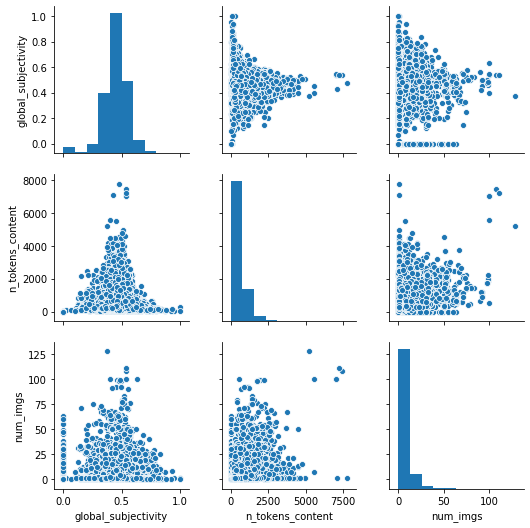

In [4]:
df_subset = df[["global_subjectivity", "n_tokens_content", "num_imgs"]]
sns.pairplot(df_subset)
plt.show()

In [5]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Y = df['shares_log'] # define the target variable (dependent variable) as y
X = df_subset 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1) #test_size=0.3 indicates the percentage of the data that should be held over for testing

Creating a training and test set for the data

In [6]:
from sklearn.linear_model import LinearRegression
   
lm = LinearRegression(); #create the lm object
model = lm.fit(X_train, y_train); #fit the model

b0 = lm.intercept_ 
b1 = lm.coef_[0]
b2 = lm.coef_[1]
b3 = lm.coef_[2]

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X + {b2:.2f}X + {b3:.2f}X") 

The regression line is equal to y = 3.10 + 0.31X + -0.00X + 0.00X


Making a linear regression line in my training set

In [7]:
from sklearn.metrics import r2_score

y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.01565240276254576

R2 is The proportion of variance that you can explain with your model. the variation we can explain is 1.6%. This is not good. 

In [8]:
import math 
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_test_p))

0.4028413630785988

The RMSE is 0.402. Which means that we are typically about 0.402 off.